In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
path = "dataset1-1.csv"
df = pd.read_csv(path)

### Count the number of cows in the dataset

In [ ]:
num_cows = df['cow'].nunique()
print(f"Total number of unique cows: {num_cows}")

Total number of unique cows: 28


### Display the ids of cows

In [ ]:
unique_cow_ids = df['cow'].unique()
print("List of unique cow IDs:")
print(unique_cow_ids)  # Prints all IDs as an array

sorted_cow_ids = sorted(df['cow'].unique())
print("\nSorted list of cow IDs:")
print(sorted_cow_ids)

List of unique cow IDs:
[6601 6610 6612 6613 6621 6629 6633 6634 6637 6638 6643 6646 6656 6664
 6674 6675 6683 6686 6689 6690 6693 6695 6699 6701 6714 6721 6750 7600]

Sorted list of cow IDs:
[6601, 6610, 6612, 6613, 6621, 6629, 6633, 6634, 6637, 6638, 6643, 6646, 6656, 6664, 6674, 6675, 6683, 6686, 6689, 6690, 6693, 6695, 6699, 6701, 6714, 6721, 6750, 7600]


### Detect outliers of features

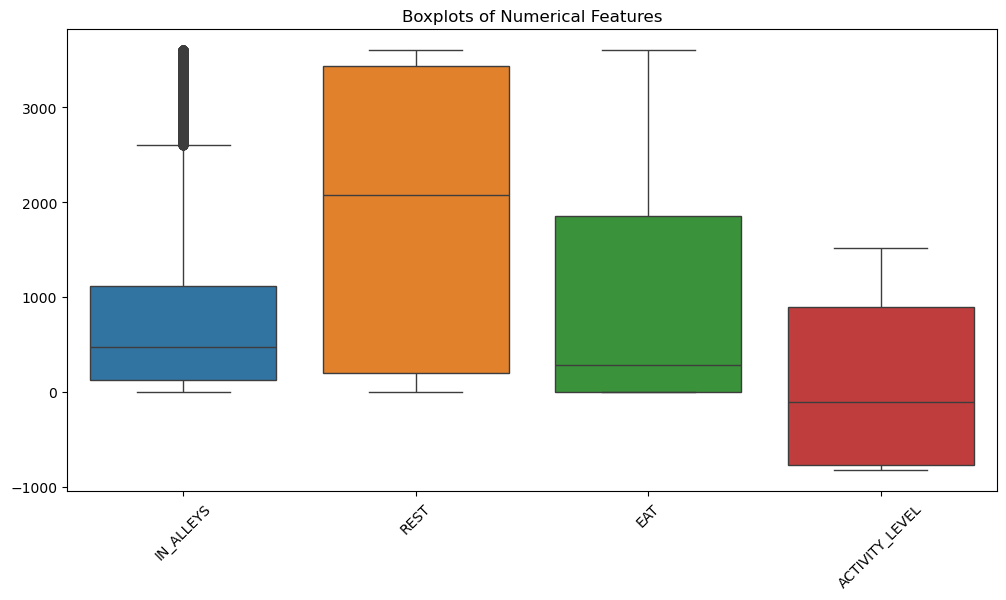

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier analysis
numerical_cols = ['IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate IQR for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")
    print(outliers[['cow', 'date', 'hour', col]].head())  # Show sample outliers


Outliers in IN_ALLEYS: 4312
     cow        date  hour  IN_ALLEYS
5   6601  2018-10-25    16   3002.638
20  6601  2018-10-26     7   3445.364
21  6601  2018-10-26     8   3229.792
68  6601  2018-10-28     7   2654.240
77  6601  2018-10-28    16   2869.032

Outliers in REST: 0
Empty DataFrame
Columns: [cow, date, hour, REST]
Index: []

Outliers in EAT: 0
Empty DataFrame
Columns: [cow, date, hour, EAT]
Index: []

Outliers in ACTIVITY_LEVEL: 0
Empty DataFrame
Columns: [cow, date, hour, ACTIVITY_LEVEL]
Index: []


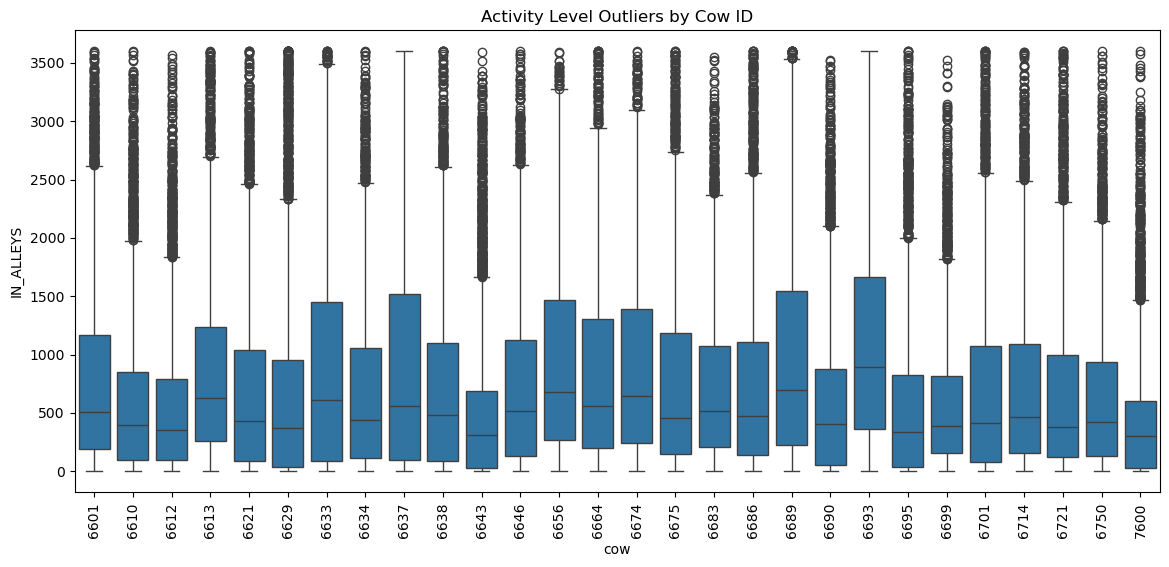

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='cow', y='IN_ALLEYS', data=df)
plt.title('Activity Level Outliers by Cow ID')
plt.xticks(rotation=90)
plt.show()

## Check missing days

### Check Date Range and Missing Dates

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Get min/max dates
min_date = df['date'].min()
max_date = df['date'].max()
print(f"Date range: {min_date} to {max_date}")

# Generate all expected dates in the range
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
print(f"Total expected days: {len(all_dates)}")

# Check missing dates
missing_dates = all_dates.difference(df['date'].unique())
print(f"\nMissing dates {len(missing_dates)}:", ', '.join(missing_dates.strftime('%Y-%m-%d')))


Date range: 2018-10-25 00:00:00 to 2019-04-17 00:00:00
Total expected days: 175

Missing dates 3: 2019-01-25, 2019-01-26, 2019-01-27


### Check Completeness per Cow

In [ ]:
# Group by cow and count unique dates
cow_date_counts = df.groupby('cow')['date'].nunique()

# Compare against expected number of days
expected_days = len(all_dates)
missing_days_per_cow = expected_days - cow_date_counts

print("\nMissing days per cow:")
print(missing_days_per_cow[missing_days_per_cow > 0])


Missing days per cow:
cow
6601     3
6610     3
6612     3
6613    30
6621     3
6629     3
6633     3
6634     3
6637     3
6638    18
6643    18
6646     3
6656     3
6664    19
6674    19
6675     3
6683    19
6686    18
6689     3
6690     3
6693    19
6695    38
6699    29
6701    18
6714    18
6721    30
6750    18
7600    19
Name: date, dtype: int64


### The number of hourly entries per cow per day

In [ ]:
hourly_counts = df.groupby(['cow', 'date']).size().reset_index(name='hourly_records')
print(hourly_counts)

       cow       date  hourly_records
0     6601 2018-10-25              13
1     6601 2018-10-26              24
2     6601 2018-10-27              24
3     6601 2018-10-28              24
4     6601 2018-10-29              24
...    ...        ...             ...
4526  7600 2019-04-13              24
4527  7600 2019-04-14              24
4528  7600 2019-04-15              24
4529  7600 2019-04-16              24
4530  7600 2019-04-17              24

[4531 rows x 3 columns]


### Filter for days with exactly 24 hours records

In [ ]:
full_days = hourly_counts[hourly_counts['hourly_records'] == 24]
print(f"\nDays with full days of records: {len(full_days)}")


Days with full days of records: 4315


### The number of full 24-hour days per cow

In [ ]:
full_days_per_cow = full_days.groupby('cow').size().reset_index(name='full_24h_days')
print("\nFull 24h days per cow:", full_days_per_cow)


Full 24h days per cow:      cow  full_24h_days
0   6601            164
1   6610            164
2   6612            164
3   6613            138
4   6621            164
5   6629            164
6   6633            164
7   6634            164
8   6637            163
9   6638            149
10  6643            150
11  6646            164
12  6656            164
13  6664            148
14  6674            149
15  6675            164
16  6683            149
17  6686            150
18  6689            163
19  6690            164
20  6693            148
21  6695            130
22  6699            139
23  6701            149
24  6714            150
25  6721            137
26  6750            150
27  7600            149


In [ ]:
print(f"Percentage of complete days: {len(full_days)/len(hourly_counts)*100:.2f}%")

Percentage of complete days: 95.23%


### Count how many 24h samples have less than 12 observations

In [ ]:
less_than_12_obs = hourly_counts[hourly_counts['hourly_records'] < 12]
print(f"Number of cow-day combinations with less than 12 hourly records: {len(less_than_12_obs)}")

if len(less_than_12_obs) > 0:
    print(less_than_12_obs)



Number of cow-day combinations with less than 12 hourly records: 0


# We will execute this code on the dataset that has 24h with less than 12 observations

In [ ]:
df_filtered = df.copy()
if len(less_than_12_obs) > 0:
    #Filter for valid cow-date combinations (at least 12 hourly records)
    valid_days = hourly_counts[hourly_counts['hourly_records'] >= 12]

    #Merge back to original data to keep only valid records
    df_filtered = pd.merge(df, valid_days[['cow', 'date']], on=['cow', 'date'], how='inner')

    # df_filtered now excludes cow-date combos with <12 hours
    print(df_filtered)

## Make One Hour Shift

In [ ]:
condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                    'acidosis', 'other_disease', 'accidents', 'disturbance',
                    'mixing']

window_size = 24
shift = 1

grouped = df.sort_values(['cow', 'date', 'hour']).groupby('cow')
shifted_windows = []

for cow_id, group in grouped:
    activity = group['ACTIVITY_LEVEL'].values
    for i in range(0, len(activity) - window_size + 1, shift):
        window = activity[i:i + window_size]
        last_hour_index = i + window_size - 1
        if last_hour_index < len(group):
            conditions = group.iloc[last_hour_index][condition_columns].to_dict()
            shifted_windows.append({
                'cow': cow_id,
                'date': group.iloc[i]['date'],
                'start_hour': group.iloc[i]['hour'],
                'activity_window': window.tolist(),
                **conditions
            })

shifted_df = pd.DataFrame(shifted_windows)

print("\nDataFrame info:")
print(f"Total windows created: {len(shifted_df)}")
print("\nFirst 3 windows:")
display(shifted_df.head(3))
print("\nColumn details:")
display(shifted_df.info())



DataFrame info:
Total windows created: 107021

First 3 windows:


,cow,date,start_hour,activity_window,oestrus,calving,lameness,mastitis,LPS,acidosis,other_disease,accidents,disturbance,mixing
0,6601,2018-10-25,11,"[-37.9351, 1009.36093, 766.08734, -315.95748, ...",0,0,0,0,0,NaN,0,0,0,0
1,6601,2018-10-25,12,"[1009.36093, 766.08734, -315.95748, 1033.46293...",0,0,0,0,0,NaN,0,0,0,0
2,6601,2018-10-25,13,"[766.08734, -315.95748, 1033.46293, 462.378, 4...",0,0,0,0,0,NaN,0,0,0,0



Column details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107021 entries, 0 to 107020
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   cow              107021 non-null  int64         
 1   date             107021 non-null  datetime64[ns]
 2   start_hour       107021 non-null  int64         
 3   activity_window  107021 non-null  object        
 4   oestrus          107021 non-null  int64         
 5   calving          107021 non-null  int64         
 6   lameness         107021 non-null  int64         
 7   mastitis         107021 non-null  int64         
 8   LPS              107021 non-null  int64         
 9   acidosis         0 non-null       float64       
 10  other_disease    107021 non-null  int64         
 11  accidents        107021 non-null  int64         
 12  disturbance      107021 non-null  int64         
 13  mixing           107021 non-null  int64         
dtypes: 

None

### Calculate the 32 features

In [ ]:
import numpy as np
from scipy import stats, fft
import pandas as pd

def calculate_all_features(activity_windows):
    """
    Calculate all 32 features for each 24-hour activity window.
    Returns a DataFrame with one row per window and 32 feature columns.
    as in the doc paragraph 2.2 considering table 3
    """
    features = []

    for window in activity_windows:
        try:
            window = np.array(window)
            if len(window) != 24:
                raise ValueError("Window must contain exactly 24 hours of data")

            feature_dict = {}

            # =============================================
            # Time-Domain Features (1-17)
            # =============================================

            # Basic statistics (1-5)
            feature_dict['Minimum'] = np.min(window)
            feature_dict['Maximum'] = np.max(window)
            feature_dict['Mean'] = np.mean(window)
            feature_dict['RMS'] = np.sqrt(np.mean(np.square(window)))
            feature_dict['STD'] = np.std(window)

            # 6-hour window statistics (6-7)
            six_h_windows = [window[i*6:(i+1)*6] for i in range(4)]
            stds_6h = [np.std(w) for w in six_h_windows]
            means_6h = [np.mean(w) for w in six_h_windows]
            feature_dict['MeanSTD6h'] = np.mean(stds_6h)
            feature_dict['STDMean6h'] = np.std(means_6h)

            # Successive differences (9)
            diffs = np.diff(window)
            feature_dict['RMSSD'] = np.sqrt(np.mean(np.square(diffs)))

            # Distribution characteristics (10-17)
            feature_dict['Mode'] = stats.mode(window, keepdims=True)[0][0] if len(window) > 0 else np.nan
            feature_dict['Q10'] = np.percentile(window, 10)
            feature_dict['Q90'] = np.percentile(window, 90)
            feature_dict['Q25'] = np.percentile(window, 25)
            feature_dict['Q50'] = np.percentile(window, 50)
            feature_dict['Q75'] = np.percentile(window, 75)
            feature_dict['Skewness'] = stats.skew(window)
            feature_dict['Kurtosis'] = stats.kurtosis(window)

            # =============================================
            # Autocorrelation Features (18-28)
            # =============================================
            for lag in range(1, 12):
                if len(window) > lag:
                    corr = np.corrcoef(window[:-lag], window[lag:])[0,1]
                else:
                    corr = np.nan
                feature_dict[f'Autocorr{lag}'] = corr

            # =============================================
            # Frequency-Domain Features (29-32)
            # =============================================
            fft_result = np.abs(fft.fft(window))
            harmonics = fft_result[1:5]  # Skip 0-frequency, take harmonics 1-4
            for i, h in enumerate(harmonics, 1):
                feature_dict[f'h{i}'] = h

            features.append(feature_dict)

        except Exception as e:
            print(f"Error processing window: {e}")
            # Return NaN for all features if error occurs
            features.append({f: np.nan for f in FEATURE_NAMES})

    return pd.DataFrame(features)

FEATURE_NAMES = [
    # Time-Domain (1-17)
    'Minimum', 'Maximum', 'Mean', 'RMS', 'STD',
    'MeanSTD6h', 'STDMean6h', 'RMSSD', 'Mode',
    'Q10', 'Q90', 'Q25', 'Q50', 'Q75',
    'Skewness', 'Kurtosis',
    # Autocorrelation (18-28)
    *[f'Autocorr{i}' for i in range(1,12)],
    # Frequency-Domain (29-32)
    *[f'h{i}' for i in range(1,5)]
]

features_df = calculate_all_features(shifted_df['activity_window'])

# Combine with original df
final_df = pd.concat([shifted_df.reset_index(drop=True),
                     features_df[FEATURE_NAMES]], axis=1)

print("Feature calculation complete. Shape:", final_df.shape)
display(final_df[FEATURE_NAMES].head(3))

Feature calculation complete. Shape: (107021, 45)


,Minimum,Maximum,Mean,RMS,STD,MeanSTD6h,STDMean6h,RMSSD,Mode,Q10,...,Autocorr6,Autocorr7,Autocorr8,Autocorr9,Autocorr10,Autocorr11,h1,h2,h3,h4
0,-823.60059,1106.93204,75.55879,684.069958,679.884238,568.048117,369.882560,738.318422,-823.60059,-811.722867,...,-0.129658,0.078303,-0.070610,-0.348338,-0.404739,-0.058220,7081.722048,1729.980705,4598.216628,3683.122508
1,-823.60059,1124.20995,123.98150,721.492952,710.760626,461.902974,530.211423,705.293453,-823.60059,-811.722867,...,-0.210321,-0.039119,-0.181107,-0.446314,-0.536692,-0.001213,8182.982255,2798.685593,3771.254085,4480.740374
2,-823.60059,1124.20995,112.40028,707.383779,698.396727,480.371970,489.983769,708.218896,-823.60059,-811.722867,...,-0.152145,-0.147945,-0.160166,-0.425398,-0.510391,-0.148842,7905.261109,2620.434912,4047.993430,4218.936723


### New dataset with one hour shift and the new 32 features

In [ ]:
from scipy import stats, fft

# 1. Define the feature calculation function (unchanged)
def calculate_features(window):
    """Calculate all 32 features for a 24-hour window"""
    features = {}
    window = np.array(window)

    # Time-Domain Features (1-17)
    features['Minimum'] = np.min(window)
    features['Maximum'] = np.max(window)
    features['Mean'] = np.mean(window)
    features['RMS'] = np.sqrt(np.mean(np.square(window)))
    features['STD'] = np.std(window)

    # 6-hour window statistics
    six_h_windows = [window[i*6:(i+1)*6] for i in range(4)]
    stds_6h = [np.std(w) for w in six_h_windows]
    means_6h = [np.mean(w) for w in six_h_windows]
    features['MeanSTD6h'] = np.mean(stds_6h)
    features['STDMean6h'] = np.std(means_6h)

    # Successive differences
    diffs = np.diff(window)
    features['RMSSD'] = np.sqrt(np.mean(np.square(diffs)))

    # Quantiles and distribution shape
    try:
        features['Mode'] = stats.mode(window, keepdims=True)[0][0]
    except:
        features['Mode'] = window[0]

    for p in [10, 25, 50, 75, 90]:
        features[f'Q{p}'] = np.percentile(window, p)
    features['Skewness'] = stats.skew(window)
    features['Kurtosis'] = stats.kurtosis(window)

    # Autocorrelations (18-28)
    for lag in range(1, 12):
        if len(window) > lag:
            corr = np.corrcoef(window[:-lag], window[lag:])[0,1]
        else:
            corr = np.nan
        features[f'Autocorr{lag}'] = corr

    # Frequency-Domain Features (29-32)
    fft_values = np.abs(fft.fft(window))[1:5]  # Harmonics 1-4
    for i, h in enumerate(fft_values, 1):
        features[f'h{i}'] = h

    return features

# 2. Create 1-hour shifted windows (updated to exclude unwanted columns)
def create_shifted_windows(df, window_size=24, shift=1):
    """Generate overlapping 24-hour windows with 1-hour shift"""
    shifted_data = []

    # Define condition columns (excluding management_changes and OK)
    condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                        'acidosis', 'other_disease', 'accidents', 'disturbance',
                        'mixing']

    # Group by cow only (not date) for continuous windows
    for cow_id, group in df.sort_values(['cow', 'date', 'hour']).groupby('cow'):
        activity = group['ACTIVITY_LEVEL'].values
        dates = group['date'].values
        hours = group['hour'].values

        # Generate all possible windows
        for i in range(0, len(activity) - window_size + 1, shift):
            window = activity[i:i + window_size]
            conditions = group.iloc[i + window_size - 1][condition_columns].to_dict()

            shifted_data.append({
                'cow': cow_id,
                'start_date': dates[i],
                'start_hour': hours[i],
                'activity_window': window.tolist(),
                **conditions
            })

    return pd.DataFrame(shifted_data)

# 3. Process your data
print("Creating 1-hour shifted windows (excluding management_changes and OK)...")
shifted_df = create_shifted_windows(df)

print("Calculating features for each window...")
feature_data = [calculate_features(w) for w in shifted_df['activity_window']]
features_df = pd.DataFrame(feature_data)

# 4. Combine into final dataset
final_df = pd.concat([
    shifted_df.drop(columns=['activity_window']),  # Keep only metadata and conditions
    features_df
], axis=1)

# 5. Save the results
output_path = "cow_activity_features_1hour_shift_clean.csv"
final_df.to_csv(output_path, index=False)

print(f"\nProcessing complete! Results saved to {output_path}")
print(f"Final dataset shape: {final_df.shape}")
print("\nFirst 3 rows of the final dataset:")
display(final_df.head(3))

Creating 1-hour shifted windows (excluding management_changes and OK)...
Calculating features for each window...

Processing complete! Results saved to cow_activity_features_1hour_shift_clean.csv
Final dataset shape: (107021, 44)

First 3 rows of the final dataset:


,cow,start_date,start_hour,oestrus,calving,lameness,mastitis,LPS,acidosis,other_disease,...,Autocorr6,Autocorr7,Autocorr8,Autocorr9,Autocorr10,Autocorr11,h1,h2,h3,h4
0,6601,2018-10-25,11,0,0,0,0,0,NaN,0,...,-0.129658,0.078303,-0.070610,-0.348338,-0.404739,-0.058220,7081.722048,1729.980705,4598.216628,3683.122508
1,6601,2018-10-25,12,0,0,0,0,0,NaN,0,...,-0.210321,-0.039119,-0.181107,-0.446314,-0.536692,-0.001213,8182.982255,2798.685593,3771.254085,4480.740374
2,6601,2018-10-25,13,0,0,0,0,0,NaN,0,...,-0.152145,-0.147945,-0.160166,-0.425398,-0.510391,-0.148842,7905.261109,2620.434912,4047.993430,4218.936723


### Compute additional statistical metrics

In [ ]:
daily_df = df_filtered.groupby(['cow', 'date']).agg({
    'IN_ALLEYS': 'sum',
    'REST': 'sum',
    'EAT': 'sum',
    'ACTIVITY_LEVEL': 'sum'
}).reset_index()


def rmse(x):
    return np.sqrt(np.mean(x**2))

#Compute statistical metrics per cow
stats_df = daily_df.groupby('cow').agg(
    min_IN_ALLEYS=('IN_ALLEYS', 'min'),
    std_IN_ALLEYS=('IN_ALLEYS', 'std'),
    quantile25_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.25)),
    quantile50_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.5)),
    quantile75_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.75)),
    rmse_IN_ALLEYS=('IN_ALLEYS', rmse),

    min_REST=('REST', 'min'),
    std_REST=('REST', 'std'),
    quantile25_REST=('REST', lambda x: x.quantile(0.25)),
    quantile50_REST=('REST', lambda x: x.quantile(0.5)),
    quantile75_REST=('REST', lambda x: x.quantile(0.75)),
    rmse_REST=('REST', rmse),

    min_EAT=('EAT', 'min'),
    std_EAT=('EAT', 'std'),
    quantile25_EAT=('EAT', lambda x: x.quantile(0.25)),
    quantile50_EAT=('EAT', lambda x: x.quantile(0.5)),
    quantile75_EAT=('EAT', lambda x: x.quantile(0.75)),
    rmse_EAT=('EAT', rmse),

    min_ACTIVITY=('ACTIVITY_LEVEL', 'min'),
    std_ACTIVITY=('ACTIVITY_LEVEL', 'std'),
    quantile25_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.25)),
    quantile50_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.5)),
    quantile75_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.75)),
    rmse_ACTIVITY=('ACTIVITY_LEVEL', rmse)
).reset_index()


print(stats_df)

     cow  min_IN_ALLEYS  std_IN_ALLEYS  quantile25_IN_ALLEYS  \
0   6601       7598.908    5510.712575           14988.07900   
1   6610       4271.099    5051.962350           11263.61150   
2   6612       3744.246    4902.237301           10001.41925   
3   6613      10199.521    7507.334277           16297.88000   
4   6621       4678.476    4194.247169           13937.38875   
5   6629       5708.735    6544.339315           12032.61475   
6   6633       7156.533    5327.724434           17299.54225   
7   6634       5645.593    5154.777109           13297.67425   
8   6637       5661.373   12092.304339           15204.80525   
9   6638       8305.464    4087.065278           14893.85600   
10  6643       4207.853    4413.840543           10261.16500   
11  6646       3979.438    4825.976803           15079.43675   
12  6656       6679.957    6657.232189           16892.55575   
13  6664       9850.101    4705.801104           16969.03825   
14  6674       9303.134    5417.442632  